# Image classification from scratch

- **Author:** Rima Das
- **Created:** 22/05/2024
- **Description:** Training an image classifier from scratch on the Kaggle Cats vs Dogs dataset.


## **Dataset Link**
Credits to :- https://www.kaggle.com/datasets/salader/dogs-vs-cats?select=train

## **Setting up Data Directory**

In [ ]:
!mkdir -p ./kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.04G/1.06G [00:05<00:00, 216MB/s]
100% 1.06G/1.06G [00:05<00:00, 217MB/s]


In [ ]:
!unzip /content/dogs-vs-cats.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/train/dogs/dog.4419.jpg  
  inflating: /content/train/dogs/dog.442.jpg  
  inflating: /content/train/dogs/dog.4420.jpg  
  inflating: /content/train/dogs/dog.4421.jpg  
  inflating: /content/train/dogs/dog.4422.jpg  
  inflating: /content/train/dogs/dog.4424.jpg  
  inflating: /content/train/dogs/dog.4425.jpg  
  inflating: /content/train/dogs/dog.4426.jpg  
  inflating: /content/train/dogs/dog.4427.jpg  
  inflating: /content/train/dogs/dog.4431.jpg  
  inflating: /content/train/dogs/dog.4433.jpg  
  inflating: /content/train/dogs/dog.4436.jpg  
  inflating: /content/train/dogs/dog.4438.jpg  
  inflating: /content/train/dogs/dog.4439.jpg  
  inflating: /content/train/dogs/dog.444.jpg  
  inflating: /content/train/dogs/dog.4440.jpg  
  inflating: /content/train/dogs/dog.4441.jpg  
  inflating: /content/train/dogs/dog.4442.jpg  
  inflating: /content/train/dogs/dog.4443.jpg  
  inflating: /content/train/dogs/dog.44

# **Installing the required libraries**

In [ ]:
!pip3 install tensorflow numpy matplotlib keras

## **Importing Packages**

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import random
import os

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

## **Reading the data**

In [ ]:
os.listdir('/content/dogs_vs_cats/train/dogs')

['dog.3534.jpg',
 'dog.10745.jpg',
 'dog.9387.jpg',
 'dog.7540.jpg',
 'dog.1242.jpg',
 'dog.10901.jpg',
 'dog.5461.jpg',
 'dog.6135.jpg',
 'dog.3359.jpg',
 'dog.3128.jpg',
 'dog.8745.jpg',
 'dog.8666.jpg',
 'dog.3500.jpg',
 'dog.4398.jpg',
 'dog.5160.jpg',
 'dog.7639.jpg',
 'dog.8060.jpg',
 'dog.1349.jpg',
 'dog.7014.jpg',
 'dog.6625.jpg',
 'dog.8753.jpg',
 'dog.7443.jpg',
 'dog.5005.jpg',
 'dog.7886.jpg',
 'dog.6740.jpg',
 'dog.1551.jpg',
 'dog.8369.jpg',
 'dog.11962.jpg',
 'dog.3852.jpg',
 'dog.83.jpg',
 'dog.2549.jpg',
 'dog.8349.jpg',
 'dog.2084.jpg',
 'dog.3537.jpg',
 'dog.5386.jpg',
 'dog.1168.jpg',
 'dog.5543.jpg',
 'dog.4617.jpg',
 'dog.12025.jpg',
 'dog.6249.jpg',
 'dog.6092.jpg',
 'dog.3280.jpg',
 'dog.12351.jpg',
 'dog.7620.jpg',
 'dog.11065.jpg',
 'dog.4717.jpg',
 'dog.5757.jpg',
 'dog.2101.jpg',
 'dog.2858.jpg',
 'dog.323.jpg',
 'dog.649.jpg',
 'dog.11603.jpg',
 'dog.7656.jpg',
 'dog.3866.jpg',
 'dog.7176.jpg',
 'dog.9303.jpg',
 'dog.5545.jpg',
 'dog.12162.jpg',
 'dog.9390

In [ ]:
random.sample(os.listdir('/content/dogs_vs_cats/train/dogs'), 5)

['dog.430.jpg', 'dog.7889.jpg', 'dog.617.jpg', 'dog.7501.jpg', 'dog.7570.jpg']

In [ ]:
def plot_images_from_directory(directory_path, class_animal, num_images=9):
    # Retrieve list of all file names in the directory
    image_filenames = os.listdir(directory_path)

    # If there are fewer images than requested, we'll just show them all
    if len(image_filenames) < num_images:
        print(f"Only found {len(image_filenames)} images in {directory_path}, displaying them all.")
        num_images = len(image_filenames)

    # Randomly select 'num_images' number of file names
    selected_images = random.sample(image_filenames, num_images)

    # Plotting the images
    fig, axes = plt.subplots(3, 3, figsize=(8, 8))  # Adjust the size as needed
    axes = axes.ravel()

    for i, image_file in enumerate(selected_images):
        image_path = os.path.join(directory_path, image_file)
        image = Image.open(image_path)
        axes[i].imshow(image)
        axes[i].set_title(f"Image: {class_animal}")
        axes[i].axis('off')  # Hide the axis

    plt.tight_layout()
    plt.show()

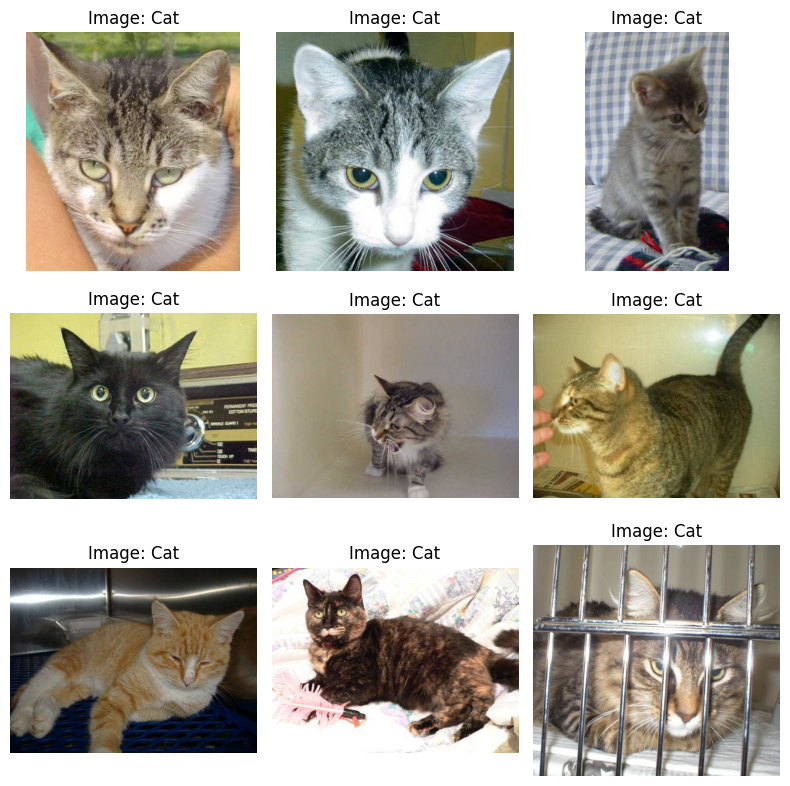

In [ ]:
# Placeholder for the directory path
cat_directory_path = '/content/dogs_vs_cats/train/cats'  # Replace with your directory path
plot_images_from_directory(cat_directory_path, class_animal = 'Cat')

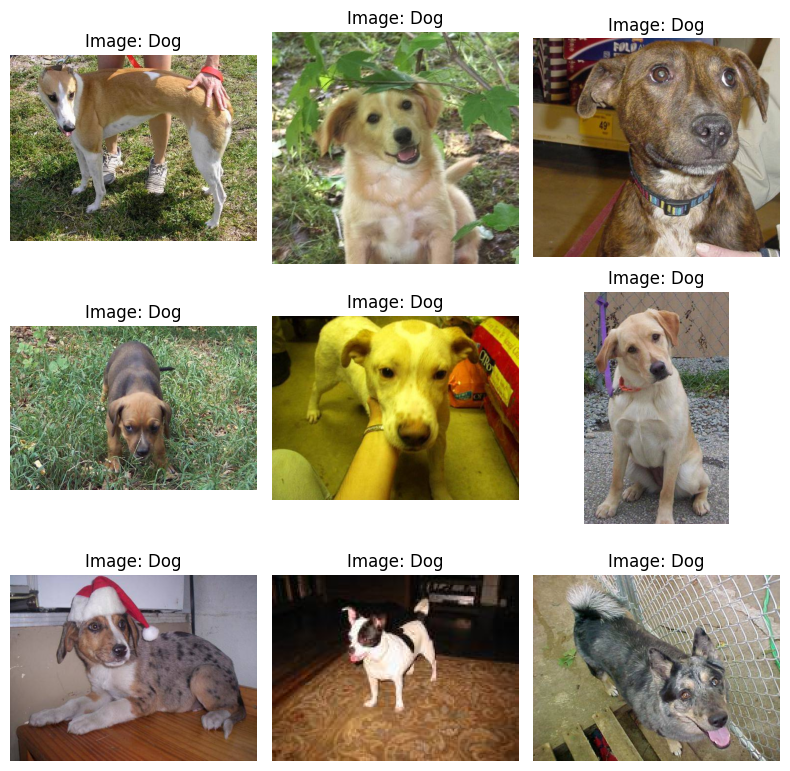

In [ ]:
# Placeholder for the directory path
dog_directory_path = '/content/dogs_vs_cats/train/dogs'  # Replace with your directory path
plot_images_from_directory(dog_directory_path, class_animal = 'Dog')

## **Data Analysis**

In [ ]:
cat_images = os.listdir(cat_directory_path)
dog_images = os.listdir(dog_directory_path)

classes_animals = ['Cats', 'Dogs']
count = [len(cat_images), len(dog_images)]

print(count)

[10000, 10000]


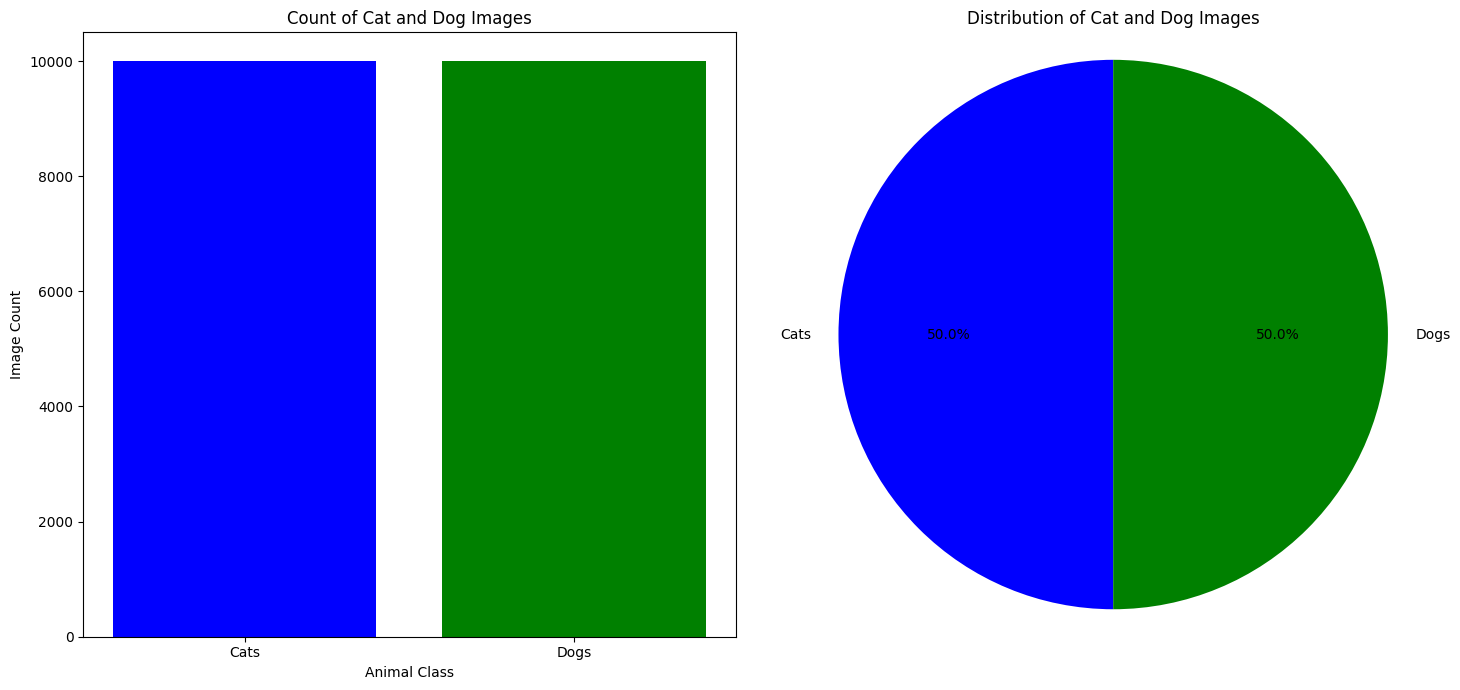

In [ ]:
# Creating both a bar chart and a pie chart side by side in a single figure

# Setting up a figure and axes for two subplots: one for the bar chart, one for the pie chart
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Bar chart on the first subplot
ax[0].bar(classes_animals, count, color=['blue', 'green'])
ax[0].set_xlabel('Animal Class')
ax[0].set_ylabel('Image Count')
ax[0].set_title('Count of Cat and Dog Images')

# Pie chart on the second subplot
colors = ['blue','green']
ax[1].pie(count, labels=classes_animals, colors=colors, autopct='%1.1f%%', startangle=90)
ax[1].set_title('Distribution of Cat and Dog Images')
ax[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust the layout so that both subplots fit nicely
plt.tight_layout()
plt.show()

## **Removing Corrupted Images**

In [ ]:
!pip3 install opencv-python

In [ ]:
import os
import cv2
import imghdr

# Define the list of acceptable image extensions
image_exts = ['jpeg', 'jpg', 'png']

# Path to the directory containing image classes and possibly other nested subdirectories
data_dir = '/content/dogs_vs_cats'

# Walk through all directories and files in the dataset
for root, dirs, files in os.walk(data_dir):
    for file in files:
        # Construct the path to the current file
        file_path = os.path.join(root, file)

        try:
            # Check the file type of the current file
            file_type = imghdr.what(file_path)

            # If the file extension is not in the allowed list, remove it
            if file_type not in image_exts:
                print(f'Image not in ext list {file_path}')
                os.remove(file_path)
            else:
                # Proceed to process the image if needed, for example, reading it with OpenCV
                img = cv2.imread(file_path)

        except Exception as e:
            # Print out the issue and the path of the problematic file
            print(f'Issue with file {file_path}. Error: {e}')
            # Optionally, remove files that cause exceptions
            os.remove(file_path)

## **Loading Shapes and Channels**

In [ ]:
def image_to_array(image_path):
    """
    Read an image and convert it to a numpy array.

    Parameters:
    image_path (str): The path to the image file.

    Returns:
    np.array: The image as a numpy array.
    """
    try:
        with Image.open(image_path) as img:
            image_array = np.array(img)
            return image_array
    except IOError:
        print(f"Could not read the image file at {image_path}.")
        return None

array([[[214, 209, 203],
        [202, 197, 191],
        [190, 185, 179],
        ...,
        [177, 174, 165],
        [190, 187, 178],
        [198, 198, 188]],

       [[203, 198, 192],
        [190, 185, 179],
        [177, 172, 166],
        ...,
        [161, 158, 149],
        [174, 171, 162],
        [183, 183, 173]],

       [[192, 187, 181],
        [177, 172, 166],
        [161, 156, 150],
        ...,
        [150, 147, 138],
        [164, 161, 152],
        [173, 173, 163]],

       ...,

       [[189, 186, 195],
        [176, 173, 180],
        [162, 160, 165],
        ...,
        [168, 172, 173],
        [178, 182, 183],
        [186, 190, 191]],

       [[199, 196, 205],
        [188, 185, 192],
        [176, 174, 179],
        ...,
        [178, 182, 183],
        [189, 193, 194],
        [196, 200, 201]],

       [[205, 202, 211],
        [196, 193, 200],
        [186, 184, 189],
        ...,
        [185, 189, 190],
        [195, 199, 200],
        [203, 207, 208]]], dtype=uint8)
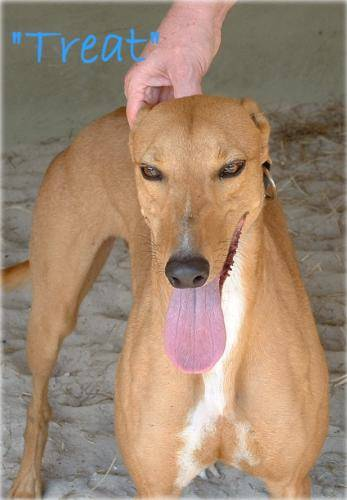

In [ ]:
image_to_array('/content/dogs_vs_cats/train/dogs/dog.1001.jpg')

## **Using CV2**

In [ ]:
image = '/content/dogs_vs_cats/train/dogs/dog.1001.jpg'

img = cv2.imread(image)

# If the image is loaded successfully, print its pixel values
if img is not None:
    print(img)
    print(img.shape)
else:
    print("The image could not be loaded. Please check the path and file permissions.")

[[[203 209 214]
  [191 197 202]
  [179 185 190]
  ...
  [165 174 177]
  [178 187 190]
  [188 198 198]]

 [[192 198 203]
  [179 185 190]
  [166 172 177]
  ...
  [149 158 161]
  [162 171 174]
  [173 183 183]]

 [[181 187 192]
  [166 172 177]
  [150 156 161]
  ...
  [138 147 150]
  [152 161 164]
  [163 173 173]]

 ...

 [[195 186 189]
  [180 173 176]
  [165 160 162]
  ...
  [173 172 168]
  [183 182 178]
  [191 190 186]]

 [[205 196 199]
  [192 185 188]
  [179 174 176]
  ...
  [183 182 178]
  [194 193 189]
  [201 200 196]]

 [[211 202 205]
  [200 193 196]
  [189 184 186]
  ...
  [190 189 185]
  [200 199 195]
  [208 207 203]]]
(500, 347, 3)


## **Using python**

In [ ]:
# Import necessary libraries
import numpy as np
from PIL import Image


# Load the image with PIL and convert to a NumPy array
img_pil = Image.open(image)
img_array = np.array(img_pil)

# Print the NumPy array of the image
print(img_array)

# Print the NumPy array of the image
print(img_array.shape)

[[[214 209 203]
  [202 197 191]
  [190 185 179]
  ...
  [177 174 165]
  [190 187 178]
  [198 198 188]]

 [[203 198 192]
  [190 185 179]
  [177 172 166]
  ...
  [161 158 149]
  [174 171 162]
  [183 183 173]]

 [[192 187 181]
  [177 172 166]
  [161 156 150]
  ...
  [150 147 138]
  [164 161 152]
  [173 173 163]]

 ...

 [[189 186 195]
  [176 173 180]
  [162 160 165]
  ...
  [168 172 173]
  [178 182 183]
  [186 190 191]]

 [[199 196 205]
  [188 185 192]
  [176 174 179]
  ...
  [178 182 183]
  [189 193 194]
  [196 200 201]]

 [[205 202 211]
  [196 193 200]
  [186 184 189]
  ...
  [185 189 190]
  [195 199 200]
  [203 207 208]]]
(500, 347, 3)


## **Building Model**

In [ ]:
# Set path to the dataset
base_dir = '/content/dogs_vs_cats/train'

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Using 20% of data for validation
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),  # Resizing images to 150x150
    batch_size=20,
    class_mode='binary',  # Since we use binary_crossentropy loss, we need binary labels
    subset='training')  # Set as training data

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    subset='validation')  # Set as validation data

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


## **Getting Class Labels**

In [ ]:
# Accessing class labels for the training data
train_class_labels = train_generator.class_indices
print("Training class labels:", train_class_labels)

# Accessing class labels for the validation data
validation_class_labels = validation_generator.class_indices
print("Validation class labels:", validation_class_labels)

Training class labels: {'cats': 0, 'dogs': 1}
Validation class labels: {'cats': 0, 'dogs': 1}


## **Visualising the Batch Images**

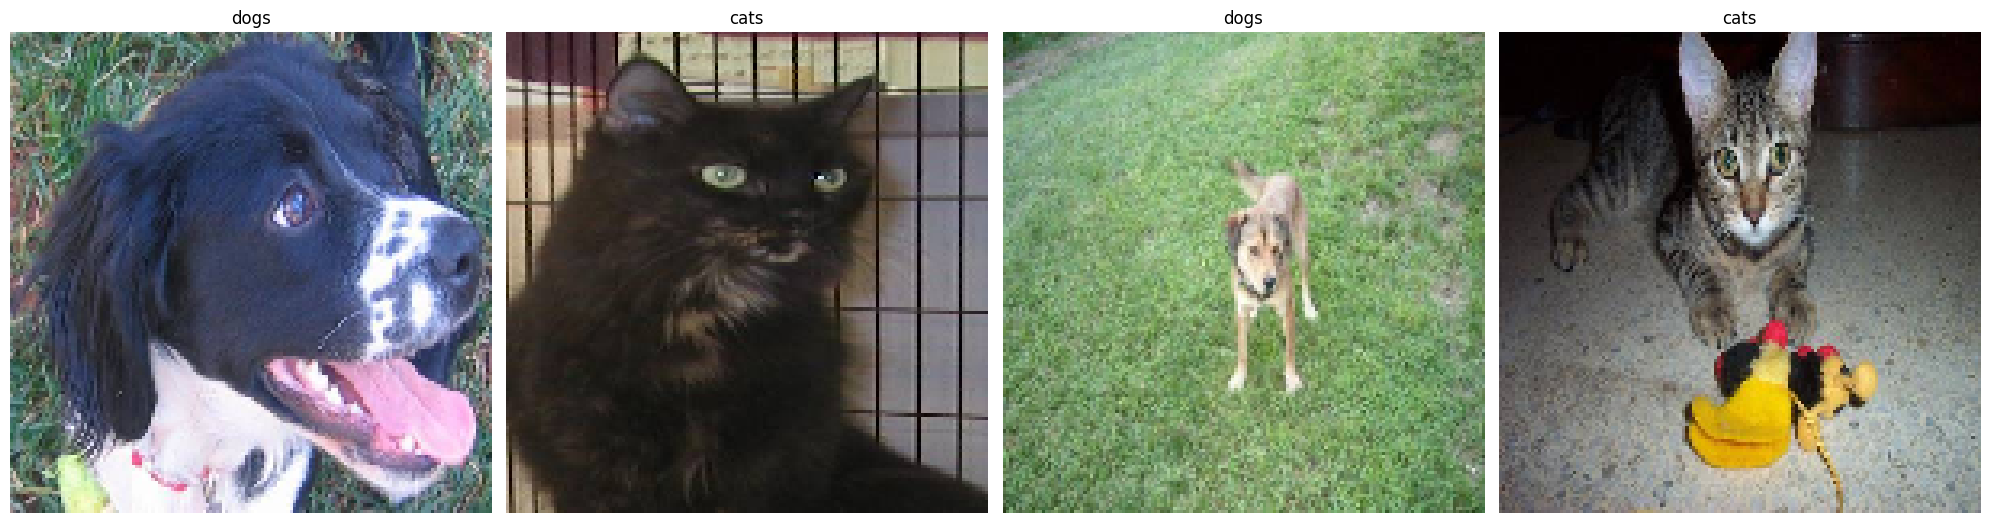

In [ ]:
import matplotlib.pyplot as plt

# Function to plot images and their labels
def plot_images_from_generator(generator, num_images=4):
    # Get a batch of images and labels from the generator
    images, labels = next(generator)

    # Set up the plot
    fig, axes = plt.subplots(1, num_images, figsize=(20,20))
    axes = axes.flatten()

    for img, label, ax in zip(images, labels, axes):
        # Image preprocessing might differ, adjust accordingly
        ax.imshow(img)
        # Set the title to the class label
        # Inverse the class indices dictionary to get class names from labels
        class_labels = dict((v,k) for k,v in generator.class_indices.items())
        ax.set_title(class_labels[int(label)])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Now, call this function with your training generator
plot_images_from_generator(train_generator, num_images=4)

In [ ]:
train_generator.reset()

## **Basic CNN Model**

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

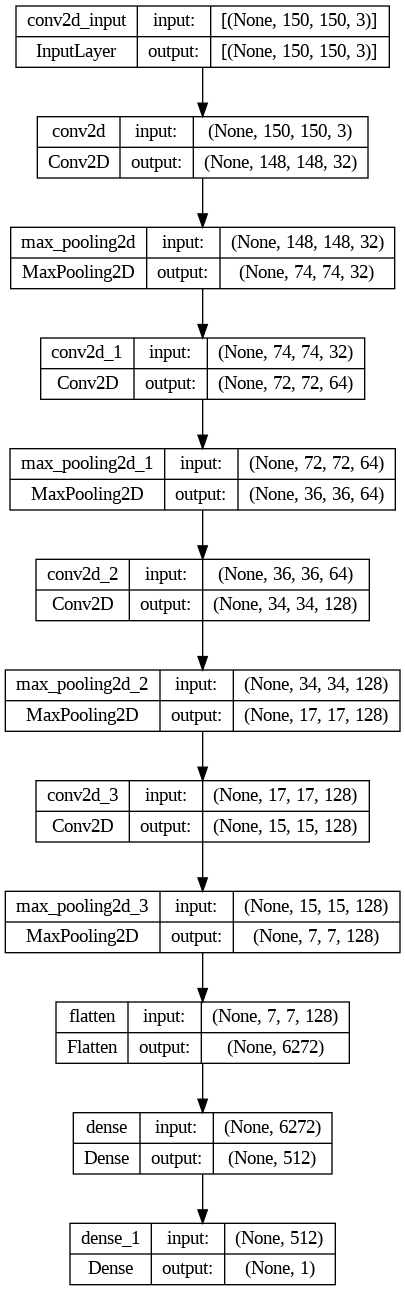

In [ ]:
plot_model(model, to_file = 'Architecture.png',
           show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
batch = 20
train_steps = np.ceil(train_generator.samples / batch)
validation_steps_per_epoch = np.ceil(validation_generator.samples / batch)
print(train_steps, validation_steps_per_epoch)

800.0 200.0


In [ ]:
history = model.fit(
                    train_generator,
                    steps_per_epoch=800,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=200)

Epoch 1/10
800/800 [==============================] - 46s 49ms/step - loss: 0.6754 - accuracy: 0.5724 - val_loss: 0.6456 - val_accuracy: 0.6177
Epoch 2/10
800/800 [==============================] - 37s 46ms/step - loss: 0.5466 - accuracy: 0.7202 - val_loss: 0.5016 - val_accuracy: 0.7535
Epoch 3/10
800/800 [==============================] - 37s 46ms/step - loss: 0.4585 - accuracy: 0.7851 - val_loss: 0.4355 - val_accuracy: 0.8020
Epoch 4/10
800/800 [==============================] - 41s 51ms/step - loss: 0.3912 - accuracy: 0.8210 - val_loss: 0.3889 - val_accuracy: 0.8215
Epoch 5/10
800/800 [==============================] - 37s 46ms/step - loss: 0.3223 - accuracy: 0.8602 - val_loss: 0.3961 - val_accuracy: 0.8290
Epoch 6/10
800/800 [==============================] - 40s 51ms/step - loss: 0.2619 - accuracy: 0.8873 - val_loss: 0.3394 - val_accuracy: 0.8510
Epoch 7/10
800/800 [==============================] - 37s 46ms/step - loss: 0.1920 - accuracy: 0.9216 - val_loss: 0.4206 - val_accuracy:

In [ ]:
history.history

{'loss': [0.6754392981529236,
  0.5465658903121948,
  0.45849740505218506,
  0.39122501015663147,
  0.3222777843475342,
  0.26193827390670776,
  0.191973015666008,
  0.13012196123600006,
  0.08578978478908539,
  0.07064711302518845],
 'accuracy': [0.5723749995231628,
  0.7201874852180481,
  0.7850624918937683,
  0.8209999799728394,
  0.8601874709129333,
  0.8872500061988831,
  0.9215624928474426,
  0.9486250281333923,
  0.9674999713897705,
  0.9730625152587891],
 'val_loss': [0.6455745100975037,
  0.5015705227851868,
  0.43552231788635254,
  0.38888019323349,
  0.3961045742034912,
  0.3394191861152649,
  0.4205920100212097,
  0.43588098883628845,
  0.5504623055458069,
  0.5985303521156311],
 'val_accuracy': [0.6177499890327454,
  0.7534999847412109,
  0.8019999861717224,
  0.8215000033378601,
  0.8289999961853027,
  0.8510000109672546,
  0.8445000052452087,
  0.8482499718666077,
  0.8287500143051147,
  0.8464999794960022]}

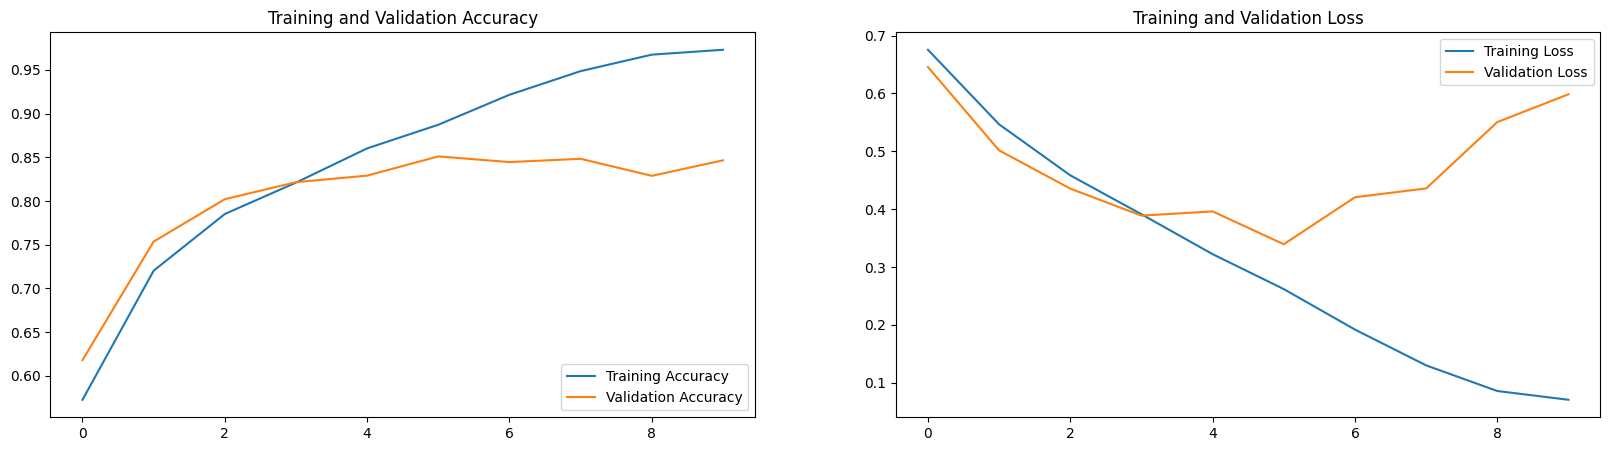

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## **Model Evluation**

### **Initiating Test Generator**

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for test data

test_dir = '/content/dogs_vs_cats/test'  # Path to your test directory

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),  # Should match the input size of your network
    batch_size=20,  # Can adjust based on your memory constraints
    class_mode='binary',  # Since we use binary_crossentropy loss, we need binary labels
    shuffle=False)  # No need to shuffle test data

Found 5000 images belonging to 2 classes.


## **Making test predictions**

In [ ]:
np.ceil(test_generator.samples/test_generator.batch_size)

250.0

In [ ]:
probabilities = model.predict(test_generator,
                              steps=np.ceil(test_generator.samples/test_generator.batch_size))
probabilities

250/250 [==============================] - 9s 35ms/step


array([[1.7824516e-11],
       [3.1910764e-05],
       [3.0908030e-08],
       ...,
       [9.9958009e-01],
       [1.1327929e-02],
       [9.9965191e-01]], dtype=float32)

In [ ]:
# Reset the test generator
test_generator.reset()

# Get the true labels
true_classes = test_generator.classes

# Predict probabilities for the positive class
probabilities = model.predict(test_generator,
                              steps=np.ceil(test_generator.samples/test_generator.batch_size))

# The output is the probability of the positive class,
# so we will threshold it at 0.5 to decide the predicted class
predicted_classes = (probabilities > 0.5).astype(int).squeeze()


# Class labels are just [0, 1] for binary classification, or you can use custom labels if you have them
class_labels = list(test_generator.class_indices.keys())
predicted_classes

250/250 [==============================] - 9s 36ms/step


array([0, 0, 0, ..., 1, 0, 1])

## **Plotting confusion Matrix**

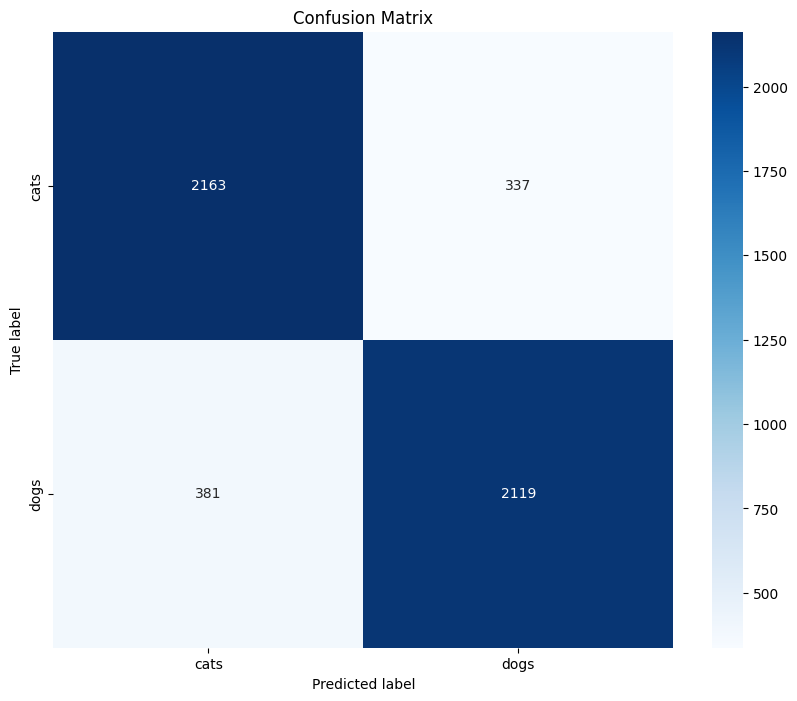

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plotting with seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## **Inference**

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {accuracy*100:.2f}%")
print(f"Test loss: {loss:.2f}")

250/250 [==============================] - 10s 39ms/step - loss: 0.5870 - accuracy: 0.8564
Test accuracy: 85.64%
Test loss: 0.59


## **Single Image Prediction**

In [ ]:
def make_prediction(image_path):
    img = load_img(img_path, target_size=(150, 150))  # Resizing the image
    img_array = img_to_array(img)  # Converting to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.  # Rescale the image similarly as we did for the training data

    prediction = model.predict(img_array)
    print("Prediction:", prediction)

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    # Prediction
    plt.subplot(1, 2, 2)
    if prediction[0][0] > 0.5:
        plt.title('Predicted: Dog')
    else:
        plt.title('Predicted: Cat')
    plt.imshow(img)  # Show the same image as prediction
    plt.axis('off')

    plt.show()

1/1 [==============================] - 0s 350ms/step
Prediction: [[0.0976801]]


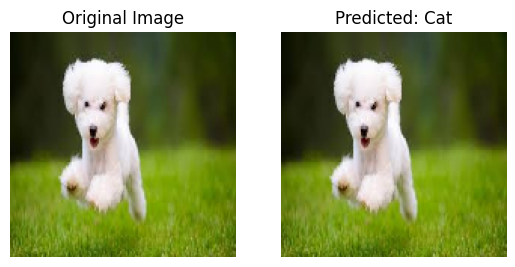

In [ ]:
# Load and preprocess the image
img_path = '/content/download.jpeg'
make_prediction(img_path)

## **MisClassifcaitons**

In [ ]:
# Reset the test_generator before making predictions
test_generator.reset()

# Predict the whole test set
predictions = model.predict(test_generator, verbose=1)

# The predictions will be in the format of probabilities. You'll need to convert these to binary labels (0 or 1) based on a 0.5 threshold.
predicted_classes = (predictions > 0.5).astype(int).reshape(-1)
true_classes = test_generator.classes
misclassified_indices = np.where(predicted_classes != true_classes)[0]
misclassified_count = len(misclassified_indices)
print(f"Total misclassifications in the test set: {misclassified_count} out of {len(true_classes)}")

250/250 [==============================] - 9s 36ms/step
Total misclassifications in the test set: 718 out of 5000


250/250 [==============================] - 9s 36ms/step
Total misclassifications: 718


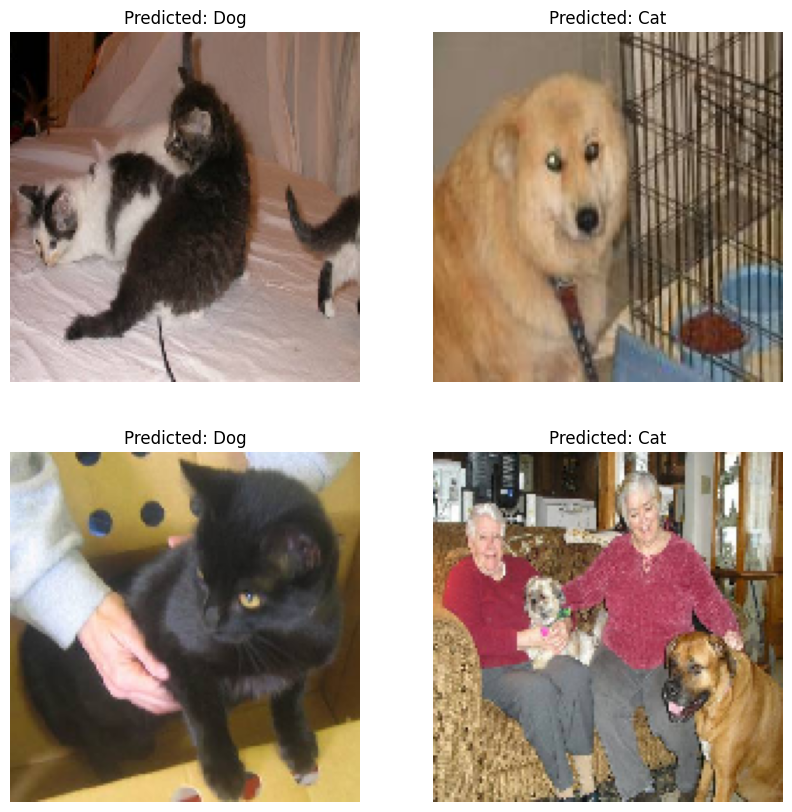

In [ ]:
# Generate predictions for all test images
predictions = model.predict(test_generator)
# Convert predictions to binary (0 or 1) based on a 0.5 threshold
predicted_classes = predictions > 0.5

# Retrieve the true labels from the generator
true_classes = test_generator.classes

# Filenames can also be useful for debugging
filenames = test_generator.filenames
# Identifying indices of misclassified images
misclassified_indices = np.where(predicted_classes.flatten() != true_classes)[0]

print(f"Total misclassifications: {len(misclassified_indices)}")


# Select a random subset of misclassified images
num_samples_to_display = 4
random_indices = random.sample(list(misclassified_indices), num_samples_to_display)

# Plot
plt.figure(figsize=(10, 10))
for i, index in enumerate(random_indices, 1):
    # Load image
    img_path = test_dir + '/' + filenames[index]
    img = load_img(img_path, target_size=(150, 150))

    # Predicted class
    predicted_class = "Dog" if predicted_classes[index] else "Cat"

    # Display
    plt.subplot(2, 2, i)
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
plt.show()

## **Visualising the kernel feature maps.**

In [ ]:
# Get all the layers in which conv is present.

for i in range(len(model.layers)):
	# check for convolutional layer
	if 'conv' not in model.layers[i].name:
		continue
	# get filter weights
	filters, biases = model.layers[i].get_weights()
	print("layer number",i,model.layers[i].name, filters.shape)

layer number 0 conv2d (3, 3, 3, 32)
layer number 2 conv2d_1 (3, 3, 32, 64)
layer number 4 conv2d_2 (3, 3, 64, 128)
layer number 6 conv2d_3 (3, 3, 128, 128)


In [ ]:
# retrieve weights from the second hidden layer
filters , bias = model.layers[2].get_weights()

In [ ]:
filters.shape, bias.shape

((3, 3, 32, 64), (64,))

In [ ]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

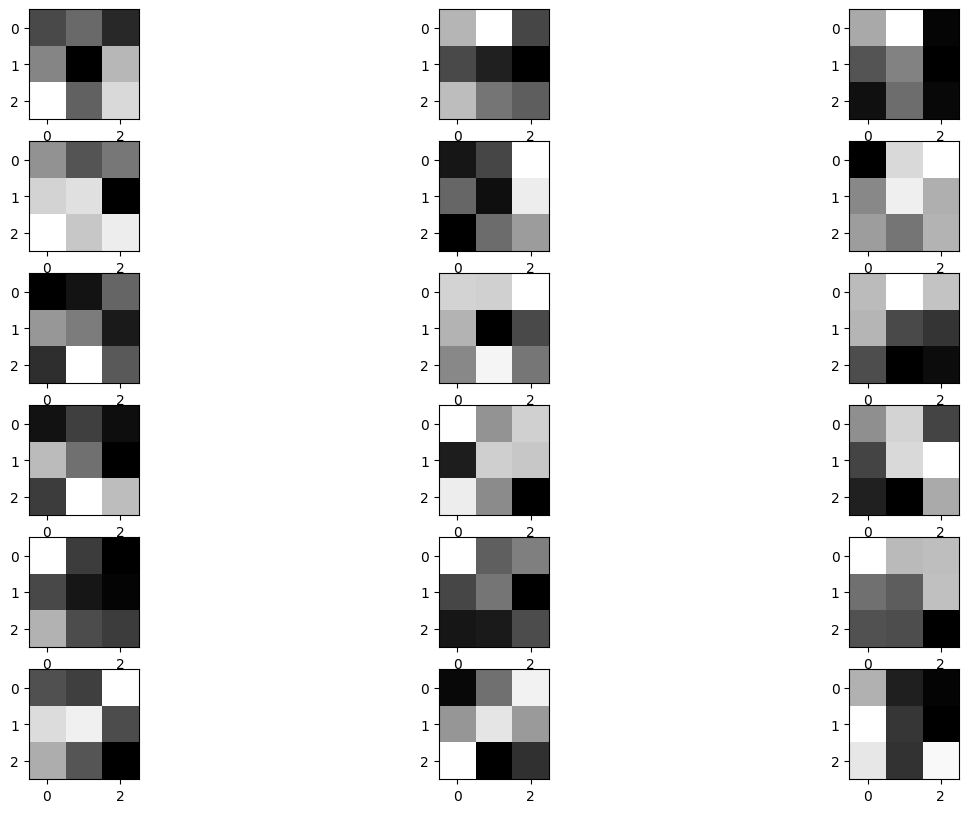

In [ ]:
n_filters=6
ix=1
fig = plt.figure(figsize=(15,10))
for i in range(n_filters):
    # get the filters
    f = filters[:,:,:,i]
    for j in range(3):
        # subplot for 6 filters and 3 channels
        plt.subplot(n_filters,3,ix)
        plt.imshow(f[:,:,j] ,cmap='gray')
        ix+=1
#plot the filters
plt.show()

1/1 [==============================] - 0s 136ms/step


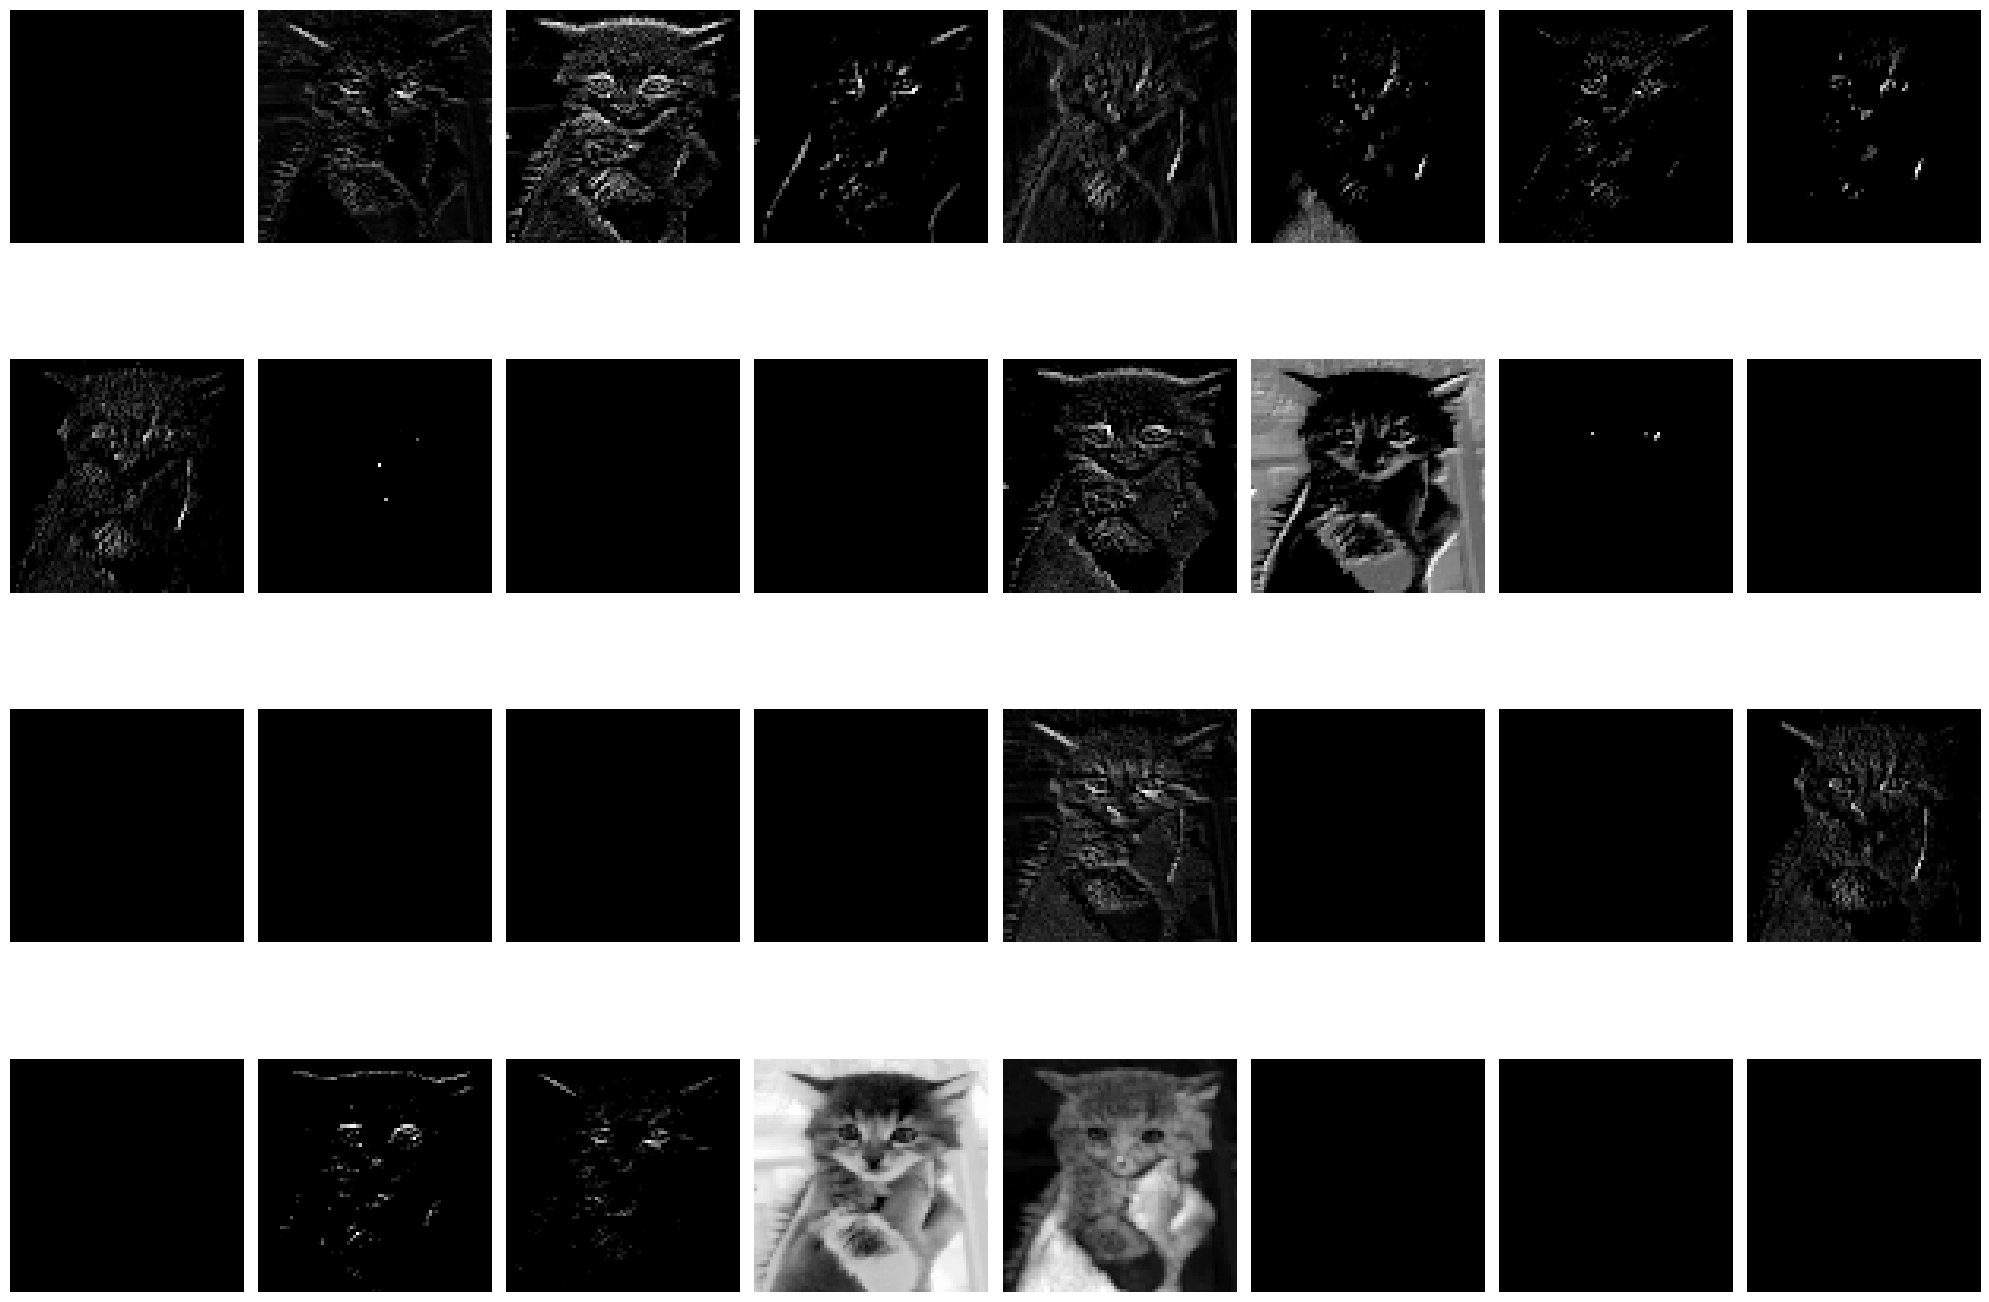

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf

# Assuming 'model' is your pre-trained CNN model
model2 = tf.keras.Model(inputs=model.inputs, outputs=model.layers[1].output)

# Load and preprocess the image
image = load_img("/content/dogs_vs_cats/train/cats/cat.100.jpg", target_size=(150, 150))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image /= 255.0

# Predicting using model2 to get the features from the desired layer
features = model2.predict(image)

# Calculate the number of grids dynamically
num_feature_maps = features.shape[-1]
num_cols = 8  # You can adjust this number based on your preference
num_rows = num_feature_maps // num_cols + (1 if num_feature_maps % num_cols else 0)

fig = plt.figure(figsize=(20, 15))
for i in range(1, num_feature_maps + 1):
    ax = fig.add_subplot(num_rows, num_cols, i)
    ax.imshow(features[0, :, :, i-1], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()